In [1]:
import pandas as pd

In [2]:
job_data1=pd.read_csv('job_data.csv')

In [26]:
# Convert published_date to datetime
job_data1['published_date'] = pd.to_datetime(job_data1['published_date'], errors='coerce')

In [27]:
# Drop rows with invalid dates
job_data1 = job_data1.dropna(subset=['published_date'])

In [28]:

# Extract year and month from the published_date
job_data1['year_month'] = job_data1['published_date'].dt.to_period('M')


C:\Users\pooji\AppData\Local\Temp\ipykernel_15936\2279838017.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  job_data1['year_month'] = job_data1['published_date'].dt.to_period('M')


In [29]:

# Convert hourly and budget columns to numeric, handling errors
job_data1['hourly_low'] = pd.to_numeric(job_data1['hourly_low'], errors='coerce')
job_data1['hourly_high'] = pd.to_numeric(job_data1['hourly_high'], errors='coerce')
job_data1['budget'] = pd.to_numeric(job_data1['budget'], errors='coerce')


In [30]:

# Fill NaN values in hourly and budget columns with 0
job_data1[['hourly_low', 'hourly_high', 'budget']] = job_data1[['hourly_low', 'hourly_high', 'budget']].fillna(0)

# Display the first few rows to verify
print(job_data1.head())

                                               title  \
0  Experienced Media Buyer For Solar Pannel and R...   
1                               Full Stack Developer   
2                                    SMMA Bubble App   
3             Talent Hunter Specialized in Marketing   
4                                      Data Engineer   

                                                link  \
0  https://www.upwork.com/jobs/Experienced-Media-...   
1  https://www.upwork.com/jobs/Full-Stack-Develop...   
2  https://www.upwork.com/jobs/SMMA-Bubble-App_%7...   
3  https://www.upwork.com/jobs/Talent-Hunter-Spec...   
4  https://www.upwork.com/jobs/Data-Engineer_%7E0...   

             published_date  is_hourly  hourly_low  hourly_high  budget  \
0 2024-02-17 09:09:54+00:00      False        15.0         30.0   500.0   
1 2024-02-17 09:09:17+00:00      False        15.0         30.0  1100.0   
2 2024-02-17 09:08:46+00:00       True        10.0         30.0   100.0   
3 2024-02-17 09:08:08+00:0

In [31]:
# Group by year_month to get the count of job postings
monthly_job_postings = job_data1.groupby('year_month').size().reset_index(name='job_postings')

# Calculate average hourly and budget
monthly_salary_trends = job_data1.groupby('year_month').agg({
    'hourly_low': 'mean',
    'hourly_high': 'mean',
    'budget': 'mean'
}).reset_index()

# Combine the data into a single DataFrame
monthly_trends = pd.merge(monthly_job_postings, monthly_salary_trends, on='year_month')

print(monthly_trends.head())

  year_month  job_postings  hourly_low  hourly_high      budget
0    2023-11             1   25.000000    50.000000  100.000000
1    2023-12            10   15.900000    35.200000  155.000000
2    2024-01            96   14.239583    31.020833  176.322917
3    2024-02        101886   16.084379    35.088766  436.674823
4    2024-03        142834   15.904561    34.647024  450.018007


d:\Apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


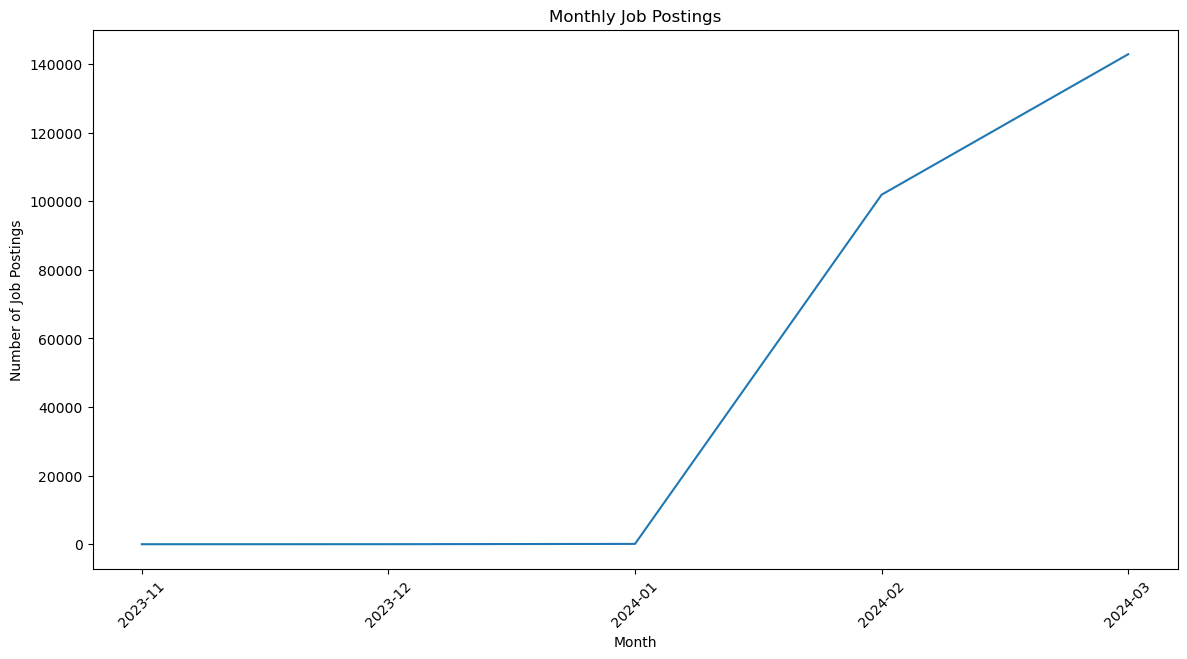

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure year_month is a string for plotting
monthly_trends['year_month'] = monthly_trends['year_month'].astype(str)

# Plot job postings over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_trends, x='year_month', y='job_postings')
plt.title('Monthly Job Postings')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.show()

d:\Apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\A

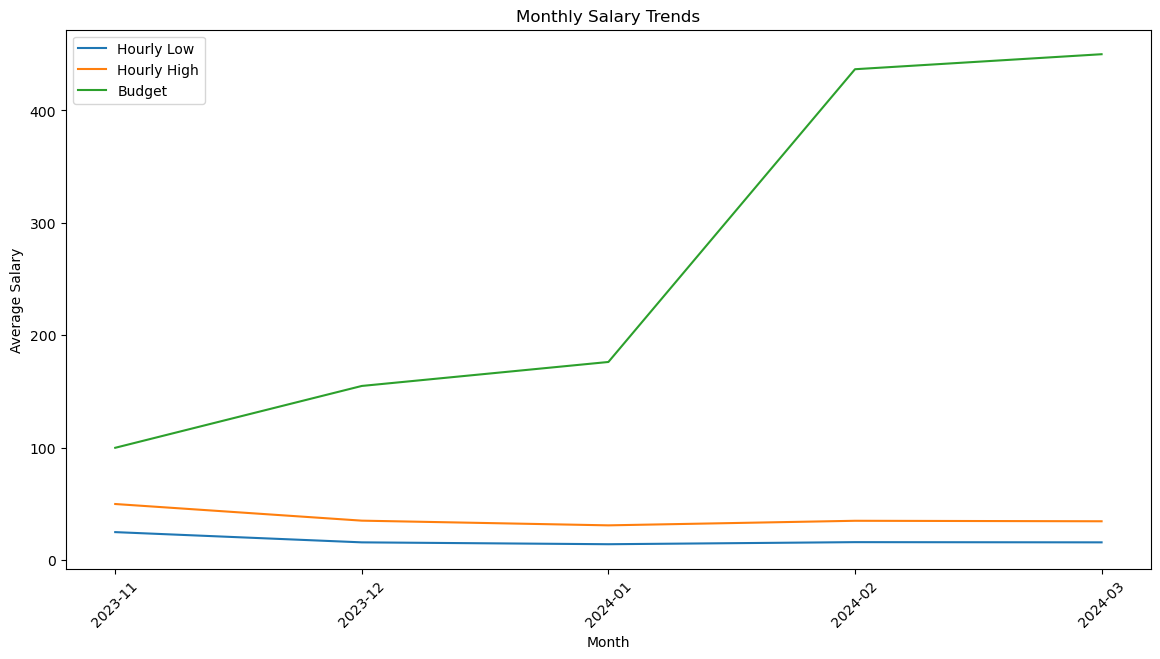

In [10]:
# Plot salary trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_trends, x='year_month', y='hourly_low', label='Hourly Low')
sns.lineplot(data=monthly_trends, x='year_month', y='hourly_high', label='Hourly High')
sns.lineplot(data=monthly_trends, x='year_month', y='budget', label='Budget')
plt.title('Monthly Salary Trends')
plt.xlabel('Month')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.legend()
plt.show()